In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5,-1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...,...
765,766,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,767,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1
767,768,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0
768,769,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1


In [4]:
dataset.drop_duplicates(inplace=True)

dataset.fillna(dataset.median(), inplace=True)

In [5]:
out_of_range = (dataset['Glucose'] <= 0) | (dataset['Glucose'] > 400)
dataset.loc[out_of_range, 'Glucose'] = dataset['Glucose'].mean()

out_of_range = (dataset['Pregncies'] < 0)
dataset.loc[out_of_range, 'Pregncies'] = np.abs(dataset['Pregncies'])

out_of_range = (dataset['BloodPressure'] <= 0) | (dataset['BloodPressure'] > 300)
dataset.loc[out_of_range, 'BloodPressure'] = dataset['BloodPressure'].mean()

out_of_range = (dataset['SkinThickness'] <= 0) | (dataset['SkinThickness'] > 100)
dataset.loc[out_of_range, 'SkinThickness'] = dataset['SkinThickness'].median()

out_of_range = (dataset['Insulin'] <= 0) | (dataset['Insulin'] > 1000)
dataset.loc[out_of_range, 'Insulin'] = dataset['Insulin'].median()

out_of_range = (dataset['BMI'] < 10) | (dataset['BMI'] > 60)
dataset.loc[out_of_range, 'BMI'] = dataset['BMI'].median()

In [6]:
dataset

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,36.0,33.6,0.627,50.0,1
1,2,1.0,85.0,66.0,29.0,36.0,26.6,0.351,31.0,0
2,3,8.0,183.0,64.0,23.0,36.0,23.3,0.672,32.0,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5,1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...,...
765,766,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,767,1.0,126.0,60.0,23.0,36.0,30.1,0.349,47.0,1
767,768,1.0,93.0,70.0,31.0,36.0,30.4,0.315,23.0,0
768,769,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1


In [7]:
data = dataset.drop(columns = ['Patient_ID', 'Outcome'])

# z_scores = (data - data.mean()) / data.std()
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)

# dataset = dataset[filtered_entries]

# cap_values = 3 * data.std() + data.mean()

# for column in data.columns:
#     dataset.loc[~filtered_entries, column] = cap_values[column][~filtered_entries[column]]


In [8]:
feature_list = data.columns

for feature in feature_list:
        mean = np.mean(dataset[feature])
        std_dev = np.std(dataset[feature])
        z_score = 3 * std_dev
        lower_cap = mean - z_score
        upper_cap = mean + z_score
        for i in range(len(dataset)):
            if dataset.loc[i, feature] < lower_cap:
                dataset.loc[i, feature] = mean
            elif dataset.loc[i, feature] > upper_cap:
                dataset.loc[i, feature] = mean

Five number summary for Insulin, BMI, and Age variables

In [9]:
summary = dataset[['Insulin', 'BMI', 'Age']].describe().loc[['min', '25%', '50%', '75%', 'max']]
print(summary)

     Insulin     BMI   Age
min     14.0  18.200  21.0
25%     36.0  27.525  24.0
50%     36.0  32.000  29.0
75%    116.0  36.375  40.0
max    415.0  52.300  68.0


Bar chart for Outcome variable

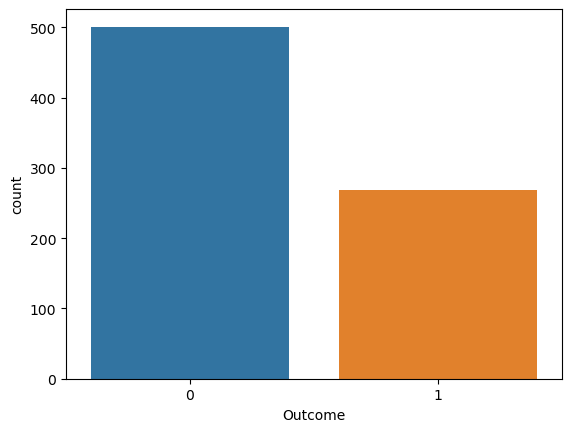

In [10]:
sns.countplot(x='Outcome', data=dataset)
plt.show()

Pairwise relationship scatterplot for predictor variables using Seaborn

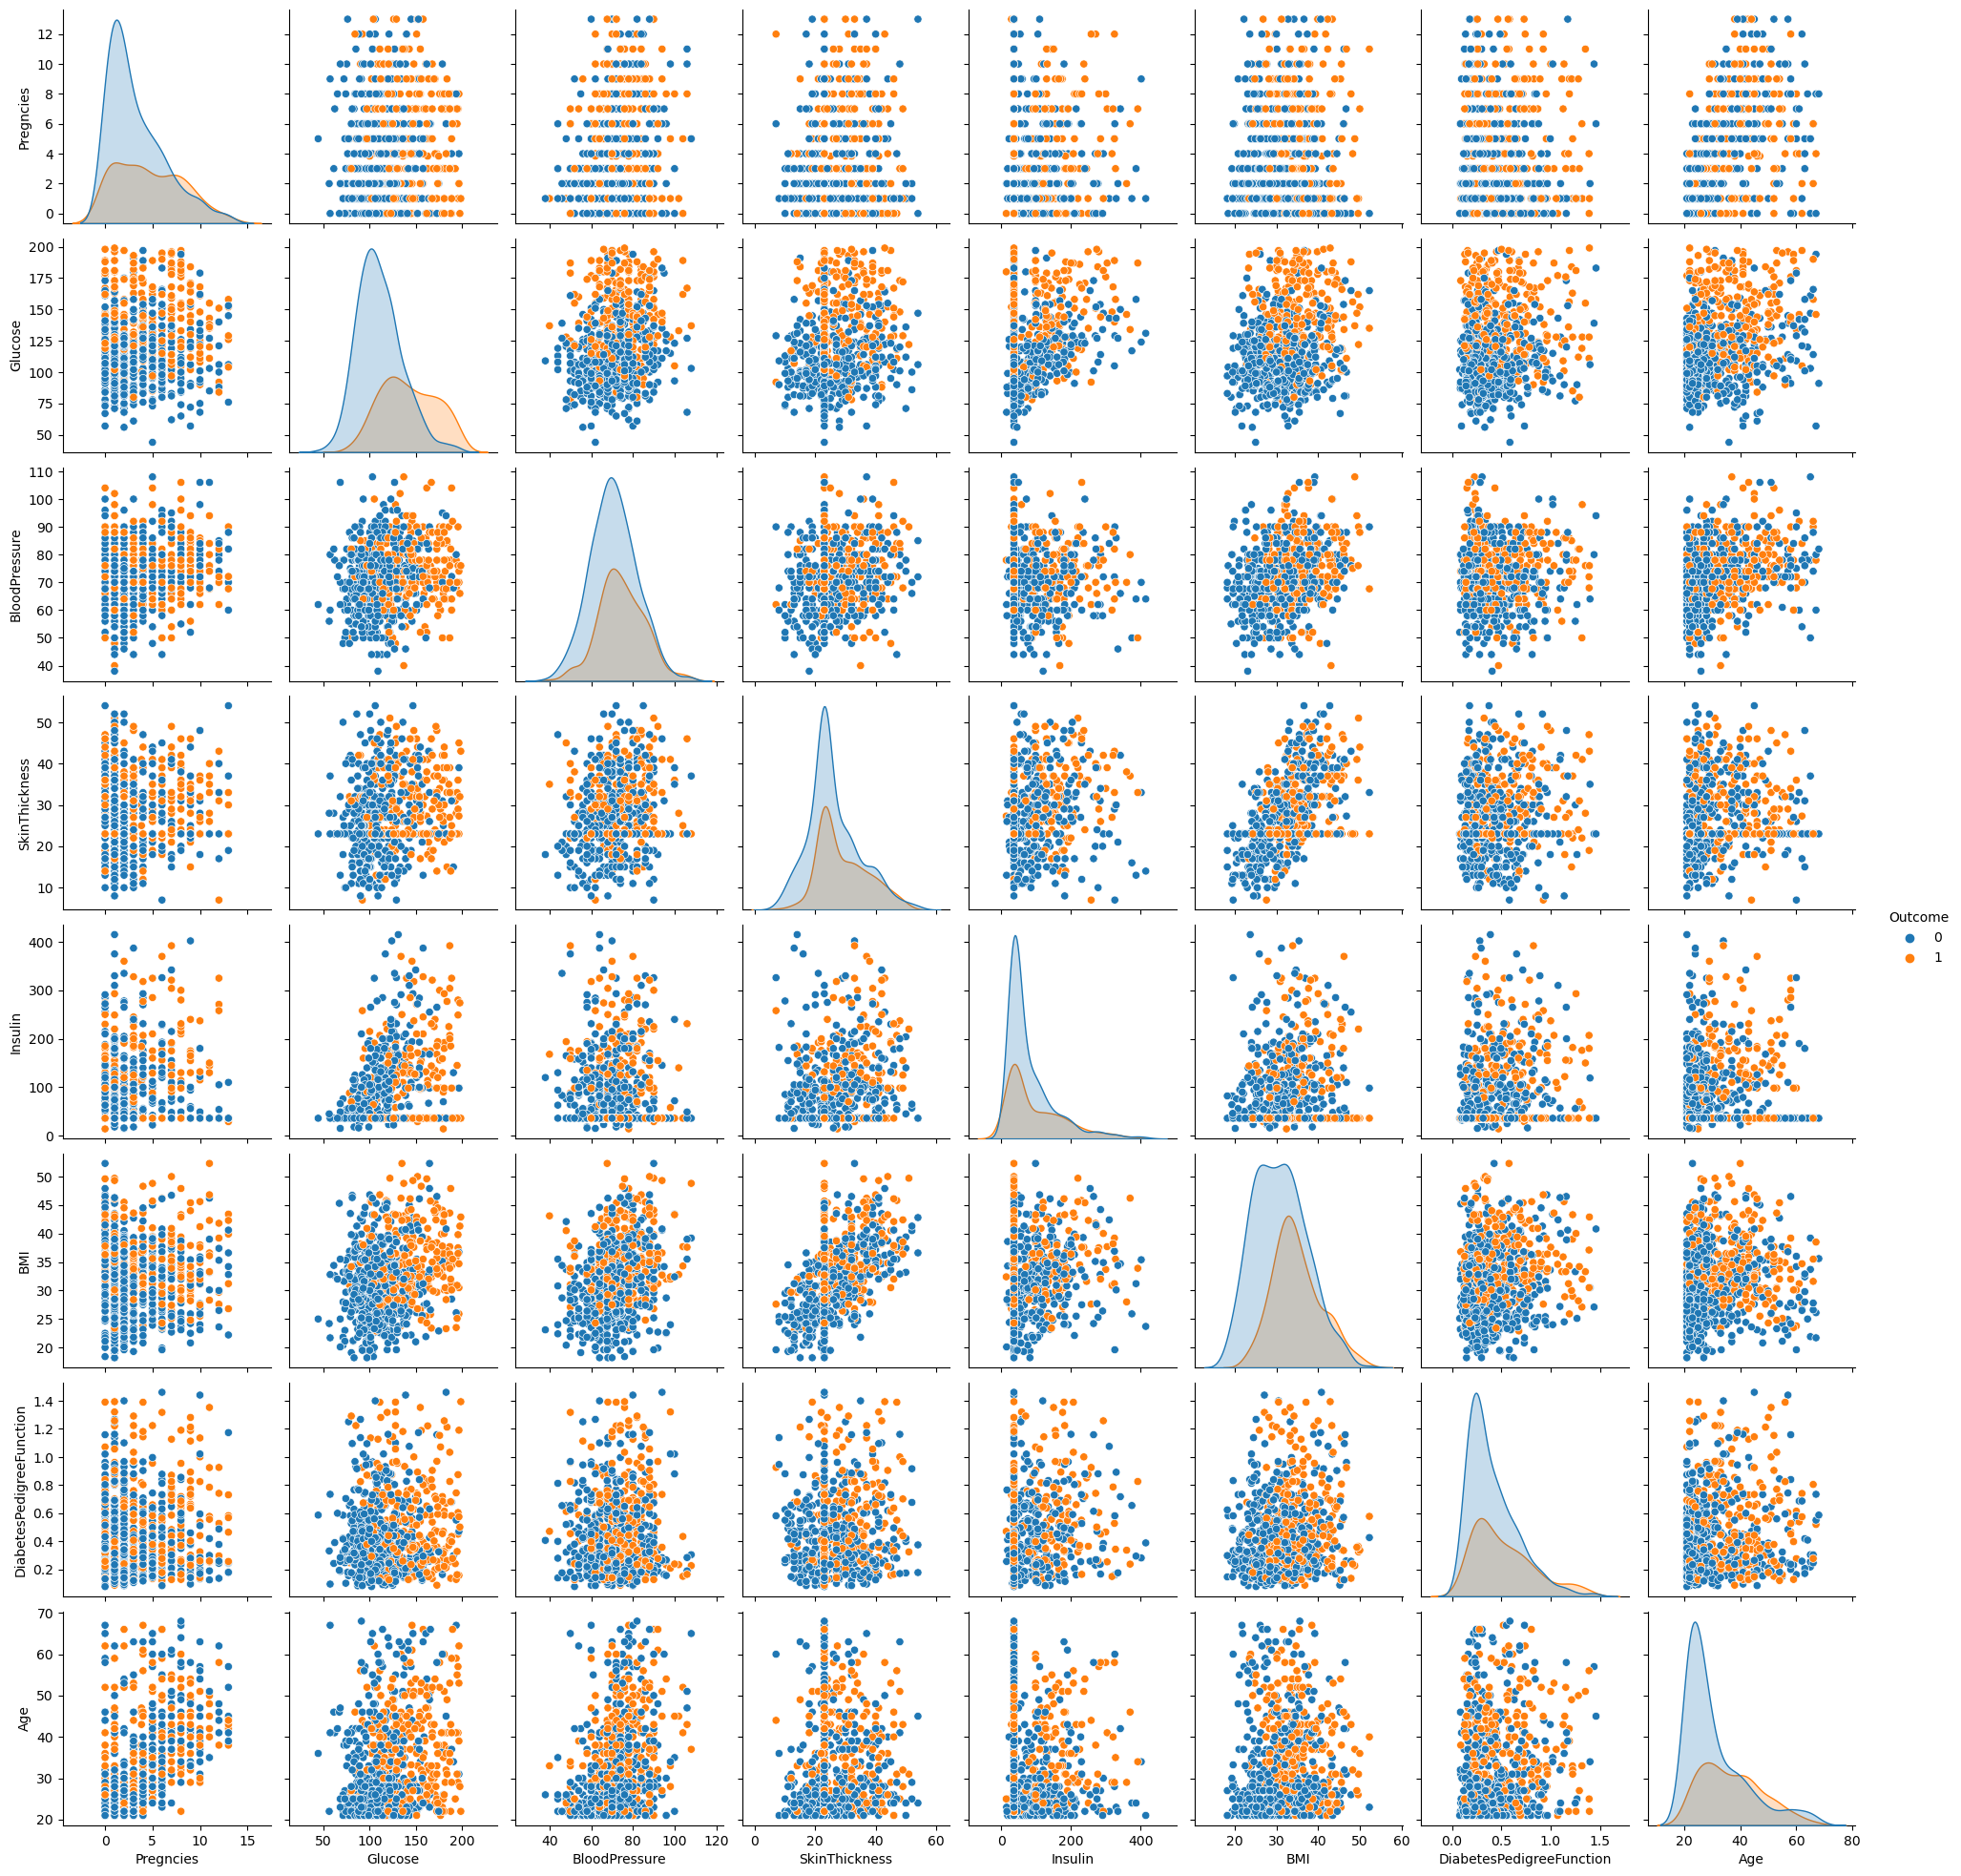

In [11]:
sns.pairplot(data=dataset.drop('Patient_ID', axis = 1), hue='Outcome')
plt.show()

Covariance between each predictor variable and the target variable (Outcome)

In [12]:
predictors = ['Pregncies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for predictor in predictors:
    covariance = np.cov(dataset[predictor], dataset['Outcome'])[0][1]
    print(f'Covariance between {predictor} and Outcome: {covariance:.2f}')

Covariance between Pregncies and Outcome: 0.32
Covariance between Glucose and Outcome: 7.23
Covariance between BloodPressure and Outcome: 0.87
Covariance between SkinThickness and Outcome: 0.73
Covariance between Insulin and Outcome: 4.31
Covariance between BMI and Outcome: 0.92
Covariance between DiabetesPedigreeFunction and Outcome: 0.03
Covariance between Age and Outcome: 1.40


In [13]:
dataset.drop('Patient_ID', axis = 1).cov()['Outcome']

Pregncies                   0.316798
Glucose                     7.233450
BloodPressure               0.874460
SkinThickness               0.732178
Insulin                     4.312446
BMI                         0.923288
DiabetesPedigreeFunction    0.026009
Age                         1.400927
Outcome                     0.227600
Name: Outcome, dtype: float64

In [14]:
dataset.drop('Patient_ID', axis = 1).corr()['Outcome']

Pregncies                   0.203258
Glucose                     0.498699
BloodPressure               0.161938
SkinThickness               0.178546
Insulin                     0.120410
BMI                         0.298510
DiabetesPedigreeFunction    0.195362
Age                         0.258777
Outcome                     1.000000
Name: Outcome, dtype: float64

Two most influential factors (variables) that increase the risk of diabetics

Covariance between Glucose and Outcome: 6.81
Covariance between Insulin and Outcome: 4.78

Glucose and Insulin are the variables which are highly correlated with the Outcome. Therefore, Glucose and Insulin are the two most influential factors that increase the risk of diabetes.

In [15]:
pre_processed_dataset = dataset

student_id = "200647R.csv" 

pre_processed_dataset.to_csv(student_id, index=False)